In [1]:
from functions import *
import os
import pandas as pd
import time
from datetime import datetime
from IPython.display import Image
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
plt.style.use('fivethirtyeight')
import pandasql as ps
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
get_current_working_directory()

'C:\\Users\\KonuTech\\Downloads\\beer_reviews_recommender'

In [3]:
change_current_working_directory('C:\\Users\\KonuTech\\Downloads\\beer_reviews_recommender')

'C:\\Users\\KonuTech\\Downloads\\beer_reviews_recommender'

In [4]:
get_current_working_directory()

'C:\\Users\\KonuTech\\Downloads\\beer_reviews_recommender'

In [5]:
get_list_of_files_from_directory(get_current_working_directory())

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'beer_reviews.csv',
 'beer_review_recommender.ipynb',
 'functions.py',
 'ini_corr_matrix.jpg',
 'ini_pair_plot.jpg',
 'README.md',
 '__pycache__']

In [6]:
#print(datetime.utcfromtimestamp(beer_reviews["review_time"][0]).strftime('%Y-%m-%d %H:%M:%S'))

In [7]:
def myparser(x):
    """
    """
    return datetime.utcfromtimestamp(int(x))

In [8]:
beer_reviews = pd.read_csv('beer_reviews.csv', index_col=["brewery_id", "beer_beerid", "review_time"], parse_dates=["review_time"], date_parser=myparser)

In [9]:
beer_reviews

brewery_name  \
brewery_id beer_beerid review_time                                        
10325      47986       2009-02-16 20:57:03              Vecchio Birraio   
           48213       2009-03-01 13:44:57              Vecchio Birraio   
           48215       2009-03-01 14:10:04              Vecchio Birraio   
           47969       2009-02-15 19:12:25              Vecchio Birraio   
1075       64883       2010-12-30 18:53:26      Caldera Brewing Company   
...                                                                 ...   
14359      33061       2006-11-05 00:01:32  The Defiant Brewing Company   
                       2006-10-17 01:29:26  The Defiant Brewing Company   
                       2006-10-13 01:21:53  The Defiant Brewing Company   
                       2006-10-05 04:37:24  The Defiant Brewing Company   
                       2006-10-04 23:41:59  The Defiant Brewing Company   

                                            review_overall  review_aroma  \
brewery_id beer_beerid review_time                                         
10325      47986       2009-02-16 20:57:03           1.500         2.000   
           48213       2009-03-01 13:44:57           3.000         2.500   
           48215       2009-03-01 14:10:04           3.000         2.500   
           47969       2009-02-15 19:12:25           3.000         3.000   
1075       64883       2010-12-30 18:53:26           4.000         4.500   
...                                                    ...           ...   
14359      33061       2006-11-05 00:01:32           5.000         4.000   
                       2006-10-17 01:29:26           4.000         5.000   
                       2006-10-13 01:21:53           4.500         3.500   
                       2006-10-05 04:37:24           4.000         4.500   
                       2006-10-04 23:41:59           5.000         4.500   

                                            review_appearance  \
brewery_id beer_beerid review_time                              
10325      47986       2009-02-16 20:57:03              2.500   
           48213       2009-03-01 13:44:57              3.000   
           48215       2009-03-01 14:10:04              3.000   
           47969       2009-02-15 19:12:25              3.500   
1075       64883       2010-12-30 18:53:26              4.000   
...                                                       ...   
14359      33061       2006-11-05 00:01:32              3.500   
                       2006-10-17 01:29:26              2.500   
                       2006-10-13 01:21:53              3.000   
                       2006-10-05 04:37:24              4.500   
                       2006-10-04 23:41:59              4.500   

                                           review_profilename  \
brewery_id beer_beerid review_time                              
10325      47986       2009-02-16 20:57:03            stcules   
           48213       2009-03-01 13:44:57            stcules   
           48215       2009-03-01 14:10:04            stcules   
           47969       2009-02-15 19:12:25            stcules   
1075       64883       2010-12-30 18:53:26     johnmichaelsen   
...                                                       ...   
14359      33061       2006-11-05 00:01:32         maddogruss   
                       2006-10-17 01:29:26          yelterdow   
                       2006-10-13 01:21:53           TongoRad   
                       2006-10-05 04:37:24           dherling   
                       2006-10-04 23:41:59               cbl2   

                                                                beer_style  \
brewery_id beer_beerid review_time                                           
10325      47986       2009-02-16 20:57:03                      Hefeweizen   
           48213       2009-03-01 13:44:57              English Strong Ale   
           48215       2009-03-01 14:10:04          Foreign / Export Stout   
           4

In [10]:
beer_reviews.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1586614 entries, (10325, 47986, Timestamp('2009-02-16 20:57:03')) to (14359, 33061, Timestamp('2006-10-04 23:41:59'))
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_name        1586599 non-null  object 
 1   review_overall      1586614 non-null  float64
 2   review_aroma        1586614 non-null  float64
 3   review_appearance   1586614 non-null  float64
 4   review_profilename  1586266 non-null  object 
 5   beer_style          1586614 non-null  object 
 6   review_palate       1586614 non-null  float64
 7   review_taste        1586614 non-null  float64
 8   beer_name           1586614 non-null  object 
 9   beer_abv            1518829 non-null  float64
dtypes: float64(6), object(4)
memory usage: 191.4+ MB


In [11]:
beer_reviews.describe()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
count,1586614.000,1586614.000,1586614.000,1586614.000,1586614.000,1518829.000
mean,3.816,3.736,3.842,3.744,3.793,7.042
std,0.721,0.698,0.616,0.682,0.732,2.323
min,0.000,1.000,0.000,1.000,1.000,0.010
25%,3.500,3.500,3.500,3.500,3.500,5.200
50%,4.000,4.000,4.000,4.000,4.000,6.500
75%,4.500,4.000,4.000,4.000,4.500,8.500
max,5.000,5.000,5.000,5.000,5.000,57.700


In [12]:
beer_reviews.isnull().sum()

brewery_name             15
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
dtype: int64

In [13]:
beer_reviews.columns

Index(['brewery_name', 'review_overall', 'review_aroma', 'review_appearance',
       'review_profilename', 'beer_style', 'review_palate', 'review_taste',
       'beer_name', 'beer_abv'],
      dtype='object')

In [14]:
unique_values = pd.DataFrame([[i, len(beer_reviews[i].unique())] for i in beer_reviews.columns]).sort_values(by=1, ascending=False)
unique_values

,0,1
8,beer_name,56857
4,review_profilename,33388
0,brewery_name,5743
9,beer_abv,531
5,beer_style,104
1,review_overall,10
3,review_appearance,10
2,review_aroma,9
6,review_palate,9
7,review_taste,9


In [15]:
def visualise_floats(dataframe, variables):
    """
    """
    for column in variables:
        ax = sns.distplot(dataframe[column].dropna(), fit=norm)
        ax.set_title("Histogram of " + str(column))
        ax.set_xlabel(str(column))
        ax.set_ylabel("Frequency Rate")
        fig = plt.figure()
        
        res = stats.probplot(dataframe[column], plot=plt)
        fig = plt.figure()

In [16]:
#visualise_floats(beer_reviews, beer_reviews.select_dtypes(include=["float64"]).columns)

In [17]:
categories = ["beer_style"]

In [18]:
#categories = ["beer_style", "brewery_name", "beer_name"]

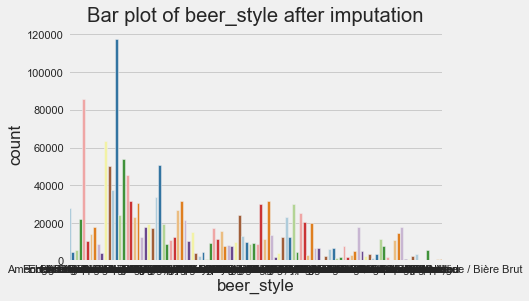

<Figure size 432x288 with 0 Axes>

In [19]:
for category in categories:
    ax = sns.countplot(beer_reviews[category], palette="Paired")
    ax.set_title("Bar plot of " + str(category) + " after imputation")
    ax.set_xlabel(str(category))
    fig = plt.figure()

In [20]:
beer_reviews.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1586614 entries, (10325, 47986, Timestamp('2009-02-16 20:57:03')) to (14359, 33061, Timestamp('2006-10-04 23:41:59'))
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_name        1586599 non-null  object 
 1   review_overall      1586614 non-null  float64
 2   review_aroma        1586614 non-null  float64
 3   review_appearance   1586614 non-null  float64
 4   review_profilename  1586266 non-null  object 
 5   beer_style          1586614 non-null  object 
 6   review_palate       1586614 non-null  float64
 7   review_taste        1586614 non-null  float64
 8   beer_name           1586614 non-null  object 
 9   beer_abv            1518829 non-null  float64
dtypes: float64(6), object(4)
memory usage: 191.4+ MB


### Boxplots

In [21]:
floats = beer_reviews.select_dtypes("float64").columns

In [22]:
#categories = ["beer_style", "brewery_name", "beer_name"]

In [23]:
categories = ["beer_style"]

In [24]:
# for category in categories:
#     for float in floats:
#         f, ax = plt.subplots(figsize=(16, 8))
#         fig = sns.boxplot(x=category, y=float, data=beer_reviews)
#         fig.axis()
#         plt.show()

In [25]:
# plt.subplots(figsize=(12,5))
# matrix = np.triu(beer_reviews.corr())
# sns_plot = sns.heatmap(beer_reviews.corr(), annot=True, mask=matrix)
# fig = sns_plot.get_figure()
# fig.savefig("ini_corr_matrix.jpg")
# plt.clf()

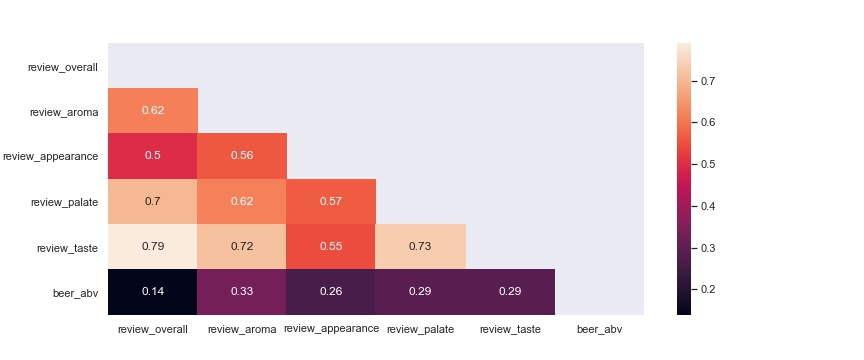

In [26]:
Image(filename='ini_corr_matrix.jpg')

In [27]:
# sns.set()
# fig = sns.pairplot(beer_reviews[floats], size = 5)
# plt.show();
# fig.savefig("ini_pair_plot.jpg")
# plt.clf()

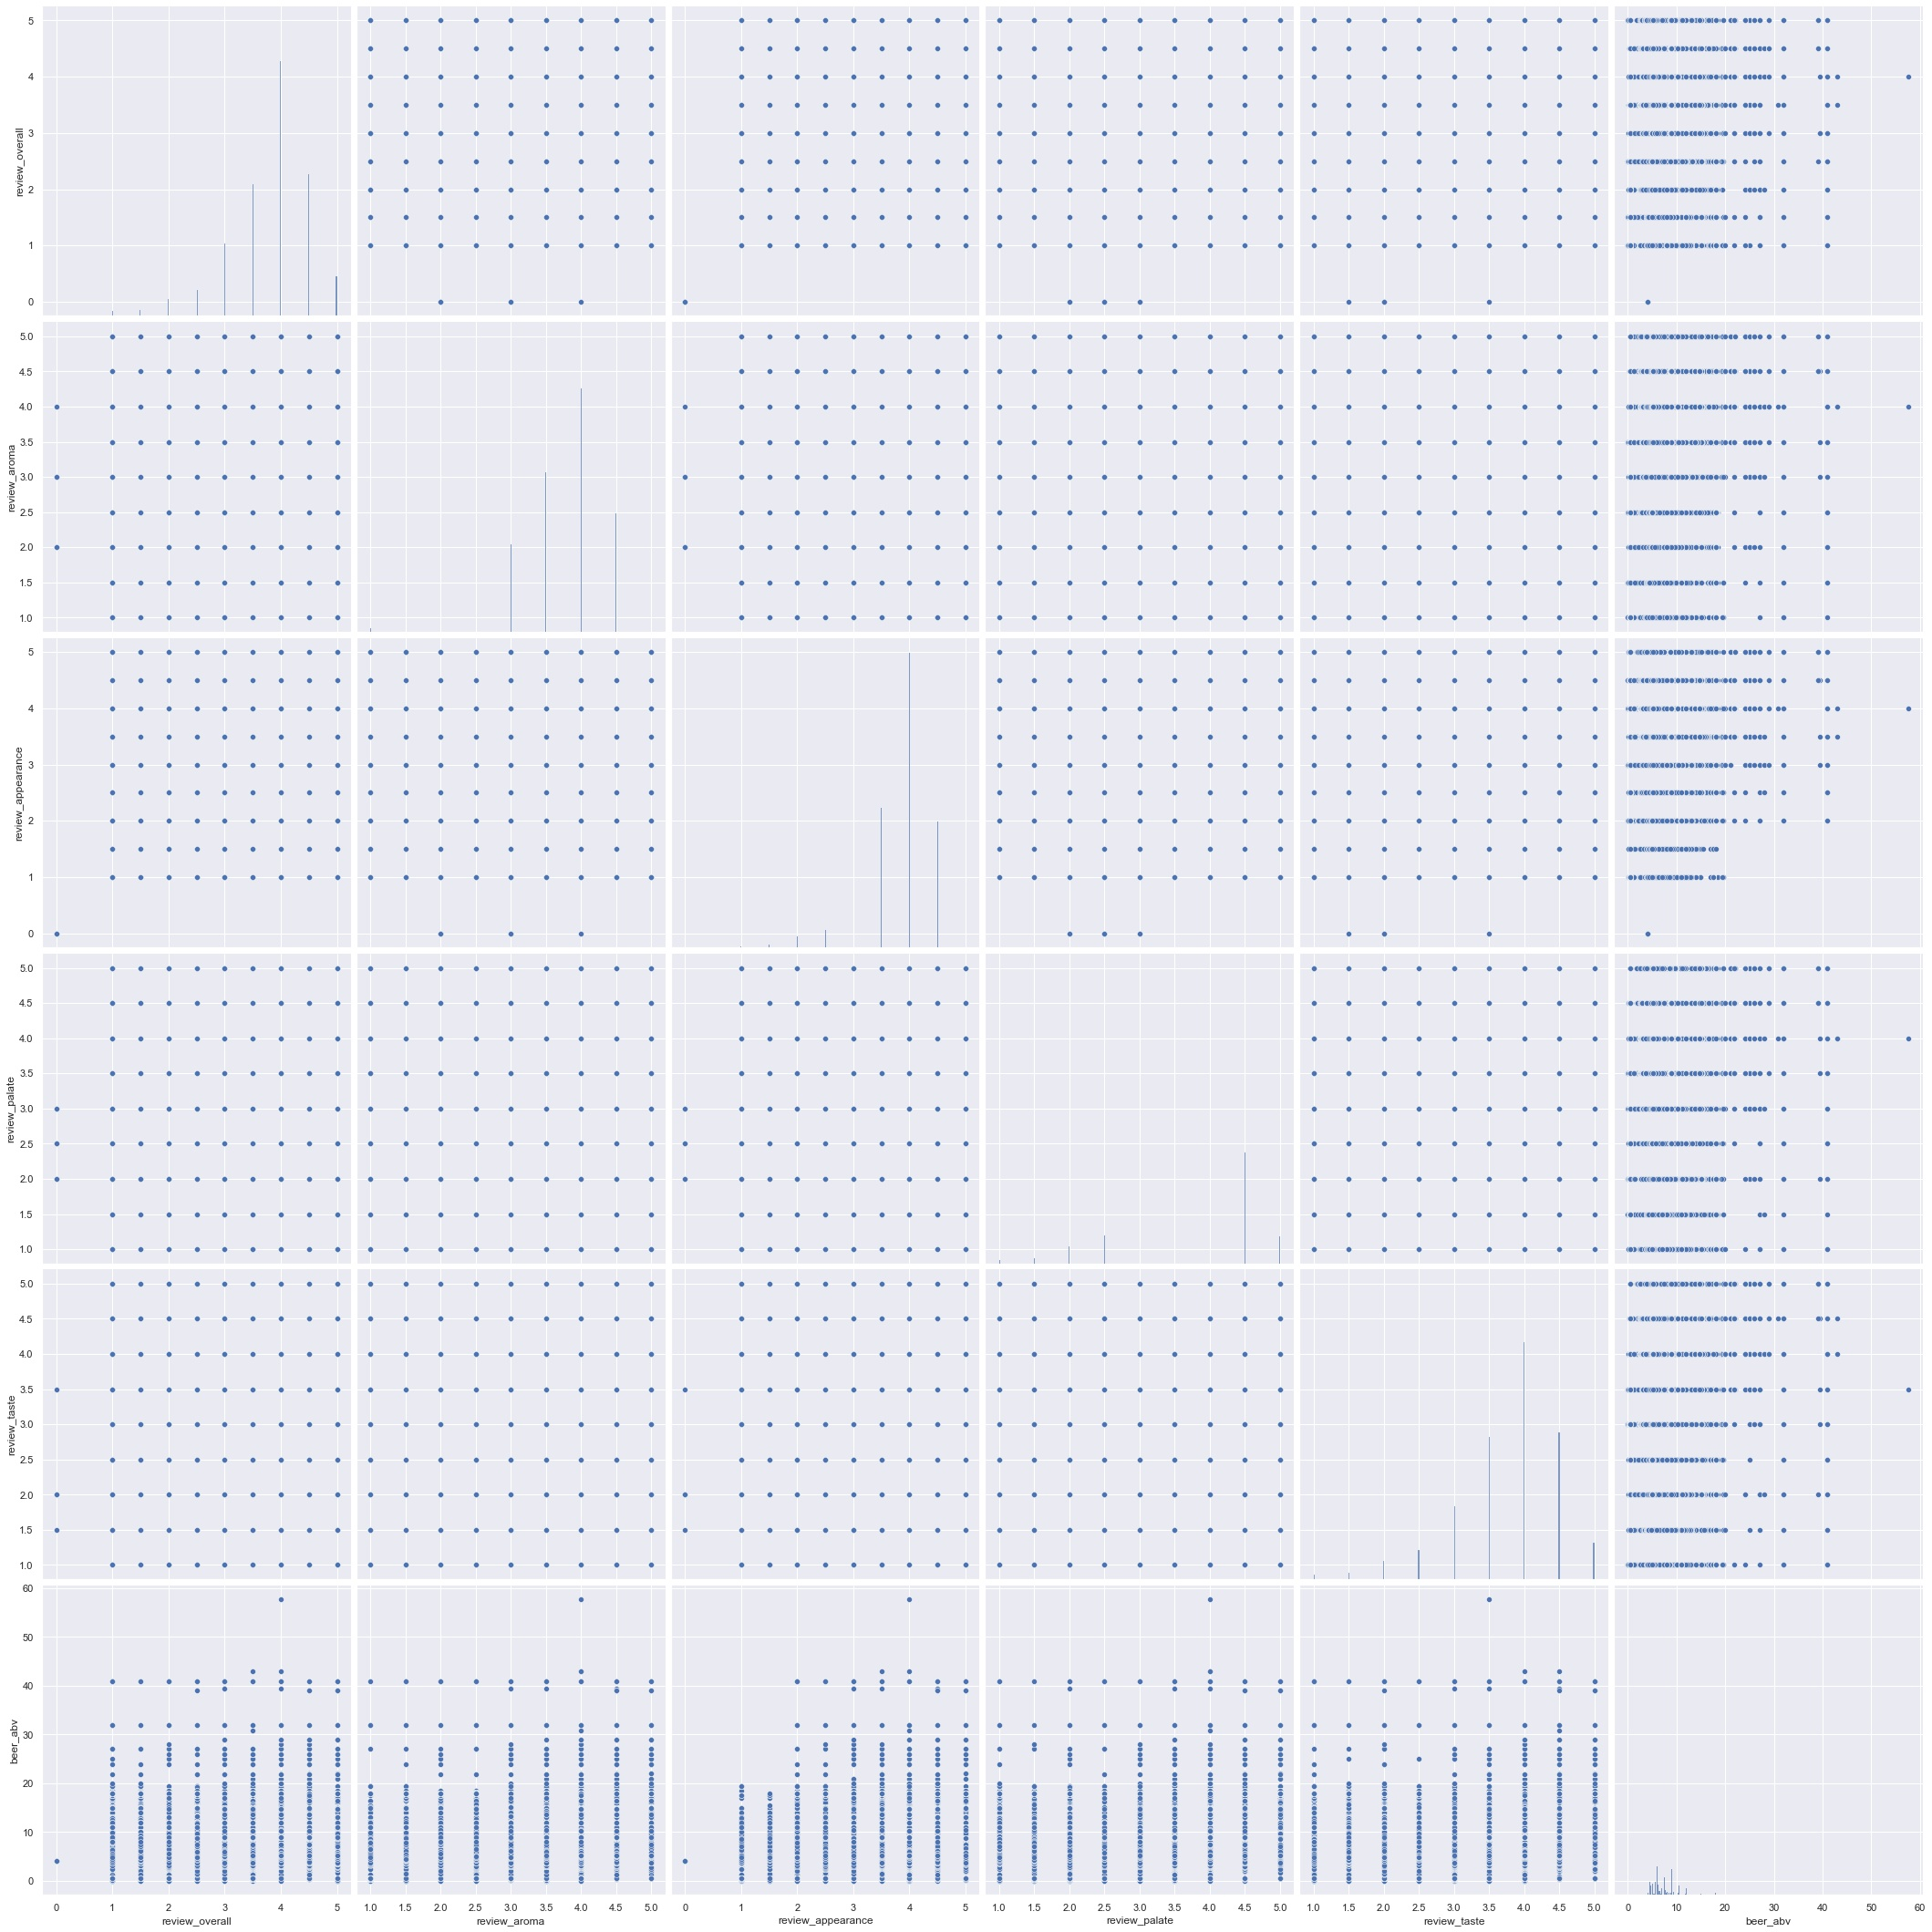

In [28]:
Image(filename='ini_pair_plot.jpg')

In [29]:
beer_reviews_copy = beer_reviews.copy()

### k-Menas for reviews_by_beer_style

In [30]:
reviews_by_beer_style = beer_reviews_copy.groupby(['beer_style']).mean().fillna(0)
reviews_by_beer_style

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
beer_style,,,,,,
Altbier,3.824,3.624,3.809,3.713,3.745,5.829
American Adjunct Lager,3.002,2.480,2.789,2.735,2.683,4.862
American Amber / Red Ale,3.781,3.627,3.810,3.657,3.696,6.032
American Amber / Red Lager,3.565,3.213,3.527,3.355,3.374,4.959
American Barleywine,3.897,4.019,4.037,3.997,4.043,10.704
...,...,...,...,...,...,...
Vienna Lager,3.763,3.434,3.698,3.560,3.604,5.020
Weizenbock,4.008,4.045,4.009,3.991,4.077,8.135
Wheatwine,3.816,3.969,3.907,3.941,3.977,10.663


In [31]:
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, n_init=10, n_jobs=-1)
    kmeans.fit_predict(reviews_by_beer_style.drop(columns=["review_overall", "beer_abv"]))
    inertia.append(kmeans.inertia_)

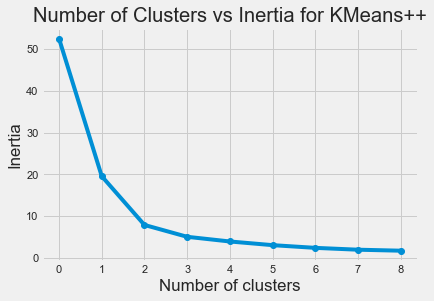

In [32]:
plt.plot(inertia, "o-", label="Inertia")
plt.title("Number of Clusters vs Inertia for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [33]:
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=2**3, max_iter=50, n_jobs=-1)

In [34]:
y_predict = kmeans.fit_predict(reviews_by_beer_style)

In [35]:
reviews_by_beer_style["cluster"] = y_predict

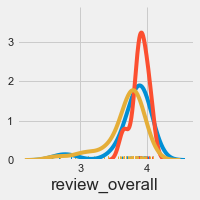

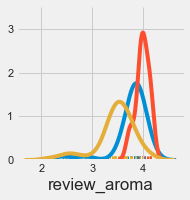

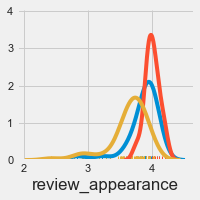

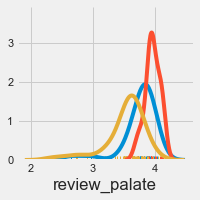

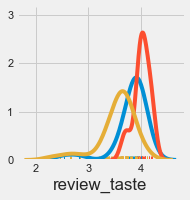

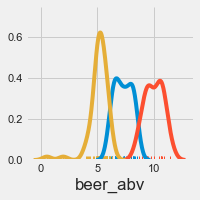

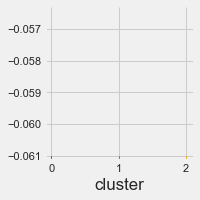

In [36]:
for column in reviews_by_beer_style:
    fig = sns.FacetGrid(reviews_by_beer_style, hue='cluster')
    fig.map(sns.distplot, column, hist=False, rug=True)
#     fig.savefig("two_clusters_distribution_plots.jpg")
#     plt.clf()

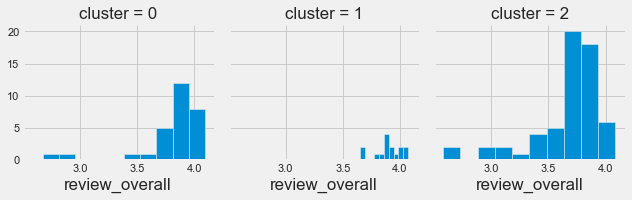

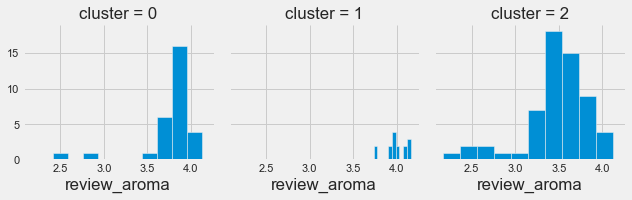

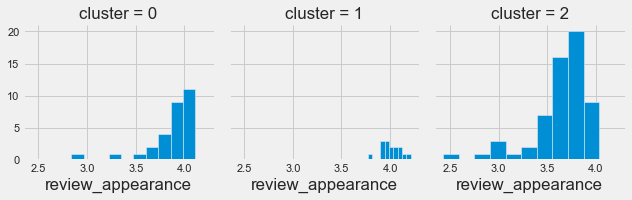

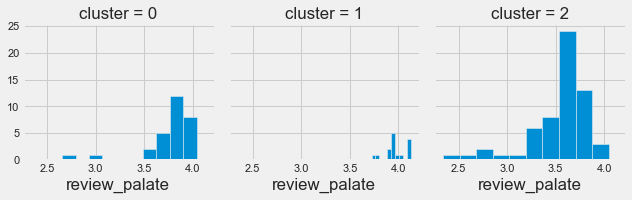

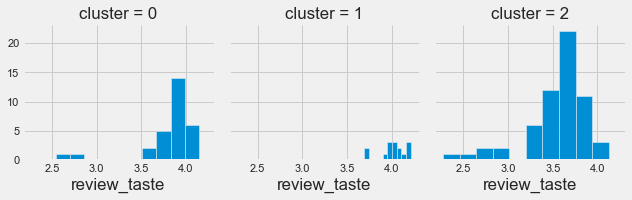

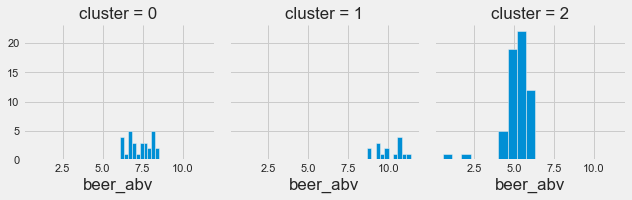

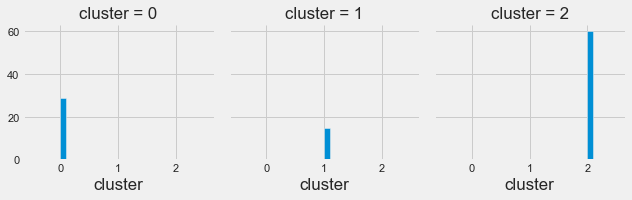

In [37]:
for column in reviews_by_beer_style:
    fig = sns.FacetGrid(reviews_by_beer_style, col="cluster")
    fig.map(plt.hist, column)
#     fig.savefig("three_clusters_histograms.jpg")
#     plt.clf()

### k-Menas for reviews_by_brewery_name

In [38]:
reviews_by_brewery_name = beer_reviews_copy.groupby(['brewery_name']).mean().fillna(0)

In [39]:
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, n_init=10, n_jobs=-1)
    kmeans.fit_predict(reviews_by_brewery_name.drop(columns=["review_overall", "beer_abv"]))
    inertia.append(kmeans.inertia_)

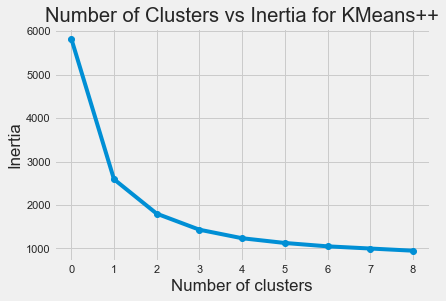

In [40]:
plt.plot(inertia, "o-", label="Inertia")
plt.title("Number of Clusters vs Inertia for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [41]:
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=2**3, max_iter=50, n_jobs=-1)

In [42]:
y_predict = kmeans.fit_predict(reviews_by_brewery_name)

In [43]:
reviews_by_brewery_name["cluster"] = y_predict

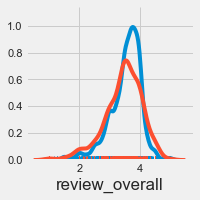

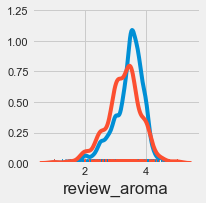

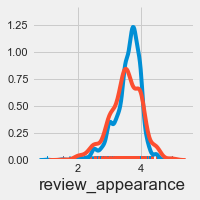

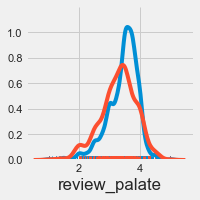

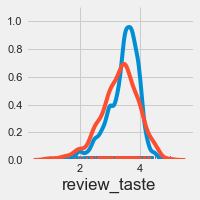

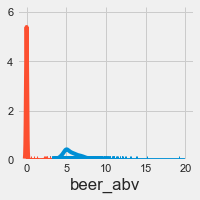

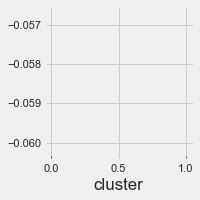

In [44]:
for column in reviews_by_brewery_name:
    fig = sns.FacetGrid(reviews_by_brewery_name, hue='cluster')
    fig.map(sns.distplot, column, hist=False, rug=True)
#     fig.savefig("two_clusters_distribution_plots.jpg")
#     plt.clf()

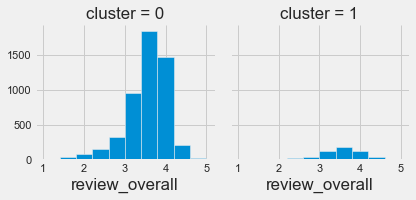

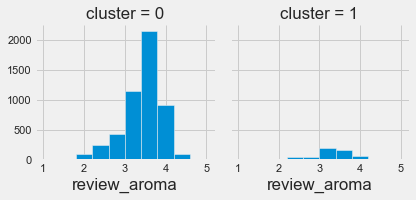

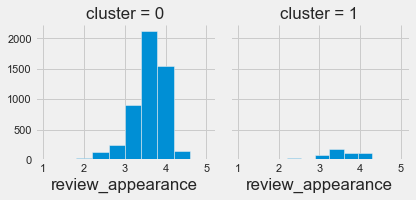

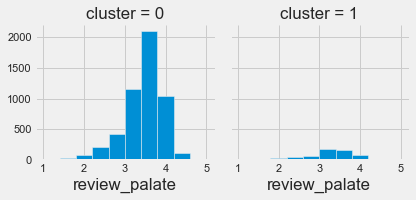

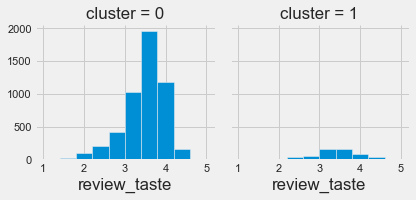

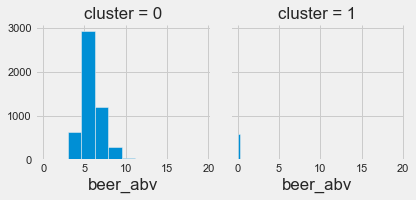

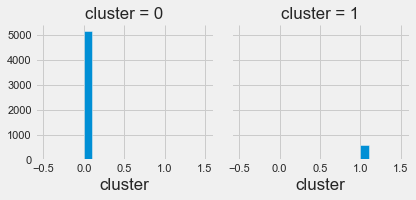

In [45]:
for column in reviews_by_brewery_name:
    fig = sns.FacetGrid(reviews_by_brewery_name, col="cluster")
    fig.map(plt.hist, column)
#     fig.savefig("three_clusters_histograms.jpg")
#     plt.clf()

### k-Menas for reviews_by_beer_name

In [46]:
reviews_by_beer_name = beer_reviews_copy.groupby(['beer_name']).mean().fillna(0)
reviews_by_beer_name

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
beer_name,,,,,,
! (Old Ale),4.000,4.500,4.000,4.000,4.500,8.200
"""100""",4.000,4.000,4.000,4.000,4.400,10.000
"""100"" Pale Ale",4.000,4.000,3.500,4.000,4.000,6.600
"""12"" Belgian Golden Strong Ale",4.000,3.500,4.250,4.750,4.500,9.000
"""33"" Export",3.000,3.000,3.000,3.167,3.000,4.800
...,...,...,...,...,...,...
Žamberecký Kanec Imperial Stout,3.750,4.500,4.500,4.250,4.000,5.500
Ω-naught (Omeganaught),4.167,4.000,4.000,3.500,3.500,5.000
“Chewy” Double IPA,2.500,2.000,4.000,3.500,2.500,6.900


In [47]:
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, n_init=10, n_jobs=-1)
    kmeans.fit_predict(reviews_by_beer_name.drop(columns=["review_overall", "beer_abv"]))
    inertia.append(kmeans.inertia_)

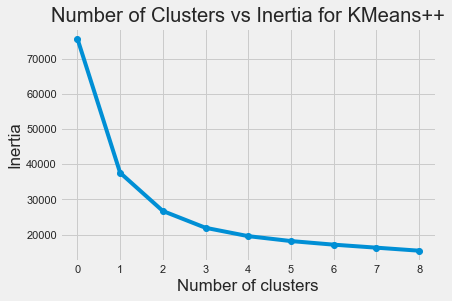

In [48]:
plt.plot(inertia, "o-", label="Inertia")
plt.title("Number of Clusters vs Inertia for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [49]:
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=2**3, max_iter=50, n_jobs=-1)

In [50]:
y_predict = kmeans.fit_predict(reviews_by_beer_name)

In [51]:
reviews_by_beer_name["cluster"] = y_predict

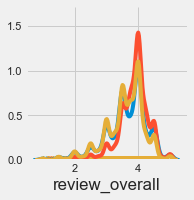

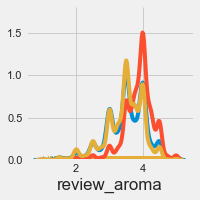

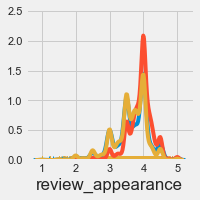

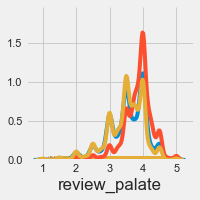

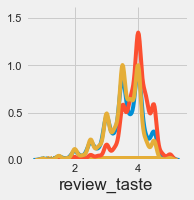

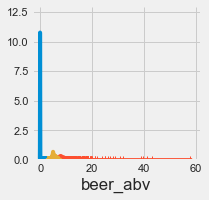

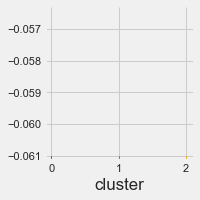

In [52]:
for column in reviews_by_beer_name:
    fig = sns.FacetGrid(reviews_by_beer_name, hue='cluster')
    fig.map(sns.distplot, column, hist=False, rug=True)
#     fig.savefig("two_clusters_distribution_plots.jpg")
#     plt.clf()

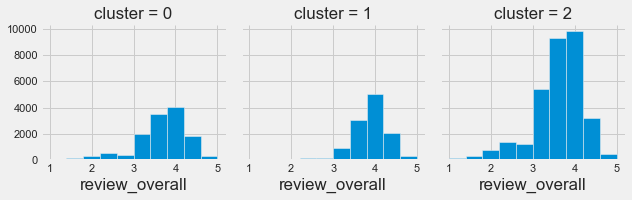

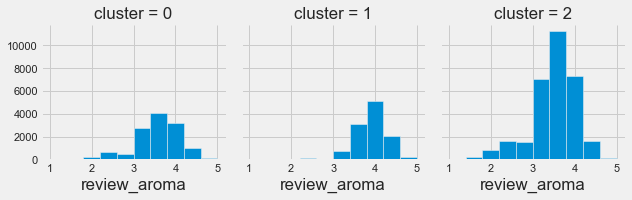

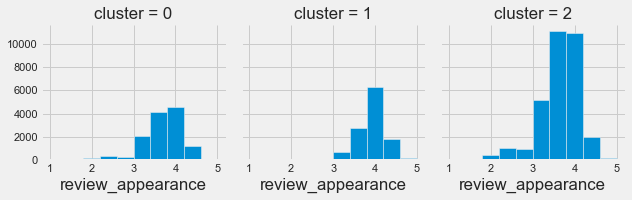

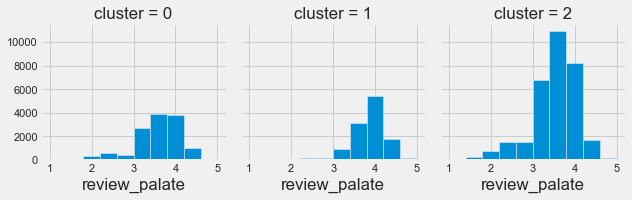

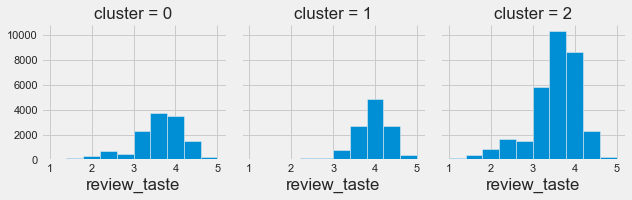

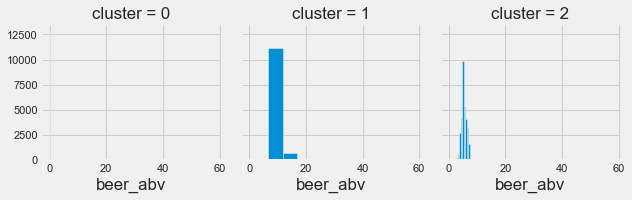

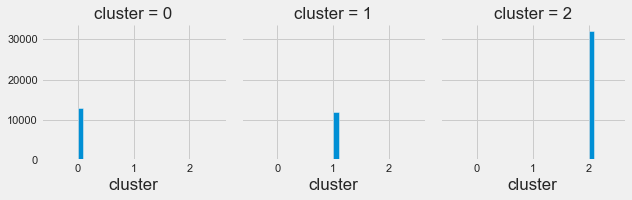

In [53]:
for column in reviews_by_beer_name:
    fig = sns.FacetGrid(reviews_by_beer_name, col="cluster")
    fig.map(plt.hist, column)
#     fig.savefig("three_clusters_histograms.jpg")
#     plt.clf()

### k-Menas for beer_reviews_copy_by_brewery_beer_name_style

In [54]:
beer_reviews_copy_by_brewery_beer_name_style = beer_reviews_copy.groupby(['brewery_name', 'beer_name', "beer_style"]).mean().fillna(0)
beer_reviews_copy_by_brewery_beer_name_style

review_overall  \
brewery_name         beer_name             beer_style                                
't Hofbrouwerijke    Blondelle             Belgian Strong Pale Ale           4.000   
                     Bosprotter            Tripel                            3.722   
                     Hof Korvatunturi      Old Ale                           3.750   
                     Hofblues              Belgian Dark Ale                  3.812   
                     Hofdraak              Belgian Dark Ale                  3.357   
...                                                                            ...   
Ørbæk Bryggeri       Nutty Nut Brown Ale   English Brown Ale                 3.500   
                     Old Danish Braggot    Braggot                           3.667   
                     Pale Ale              American Pale Ale (APA)           4.250   
                     WeissBier Hyldeblomst Hefeweizen                        3.500   
Łódzkie Browary S.A. Porter &#321;ódzki    Baltic Porter                     3.500   

                                                                    review_aroma  \
brewery_name         beer_name             beer_style                              
't Hofbrouwerijke    Blondelle             Belgian Strong Pale Ale         4.500   
                     Bosprotter            Tripel                          3.833   
                     Hof Korvatunturi      Old Ale                         4.000   
                     Hofblues              Belgian Dark Ale                3.812   
                     Hofdraak              Belgian Dark Ale                3.429   
...                                                                          ...   
Ørbæk Bryggeri       Nutty Nut Brown Ale   English Brown Ale               2.500   
                     Old Danish Braggot    Braggot                         3.667   
                     Pale Ale              American Pale Ale (APA)         5.000   
                     WeissBier Hyldeblomst Hefeweizen                      4.000   
Łódzkie Browary S.A. Porter &#321;ódzki    Baltic Porter                   4.000   

                                                                    review_appearance  \
brewery_name         beer_name             beer_style                                   
't Hofbrouwerijke    Blondelle             Belgian Strong Pale Ale              3.500   
                     Bosprotter            Tripel                               3.667   
                     Hof Korvatunturi      Old Ale                              3.750   
                     Hofblues              Belgian Dark Ale                     4.000   
                     Hofdraak              Belgian Dark Ale                     3.714   
...                                                                               ...   
Ørbæk Bryggeri       Nutty Nut Brown Ale   English Brown Ale                    3.250   
                     Old Danish Braggot    Braggot                              3.833   
                     Pale Ale              American Pale Ale (APA)              4.000   
                     WeissBier Hyldeblomst Hefeweizen                           4.000   
Łódzkie Browary S.A. Porter &#321;ódzki    Baltic Porter                        4.000   

                                                                    review_palate  \
brewery_name         beer_name             beer_style                               
't Hofbrouwerijke    Blondelle             Belgian Strong Pale Ale          4.000   
                     Bosprotter            Tripel                           3.611   
                     Hof Korvatunturi      Old Ale                          3.500   
                     Hofblues              Belgian Dark Ale                 3.625   
                     Hofdraak              Belgian Dark Ale                 3.143   
...                                                                           ...   
Ørbæk Bryggeri    

In [55]:
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, n_init=10, n_jobs=-1)
    kmeans.fit_predict(beer_reviews_copy_by_brewery_beer_name_style.drop(columns=["review_overall", "beer_abv"]))
    inertia.append(kmeans.inertia_)

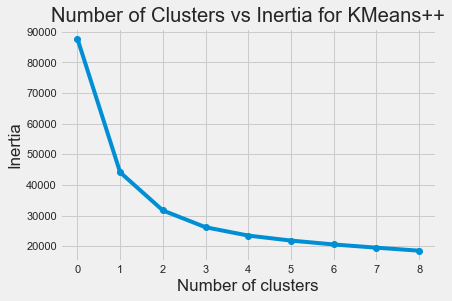

In [56]:
plt.plot(inertia, "o-", label="Inertia")
plt.title("Number of Clusters vs Inertia for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [57]:
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=2**3, max_iter=50, n_jobs=-1)

In [58]:
y_predict = kmeans.fit_predict(beer_reviews_copy_by_brewery_beer_name_style)

In [59]:
beer_reviews_copy_by_brewery_beer_name_style["cluster"] = y_predict

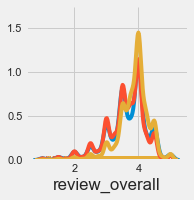

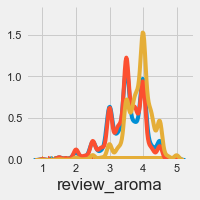

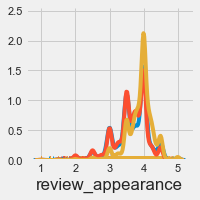

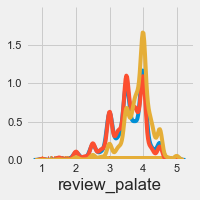

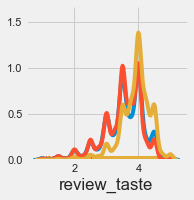

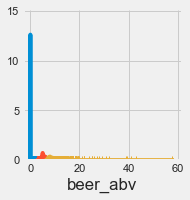

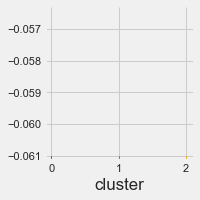

In [60]:
for column in beer_reviews_copy_by_brewery_beer_name_style:
    fig = sns.FacetGrid(beer_reviews_copy_by_brewery_beer_name_style, hue='cluster')
    fig.map(sns.distplot, column, hist=False, rug=True)
#     fig.savefig("two_clusters_distribution_plots.jpg")
#     plt.clf()

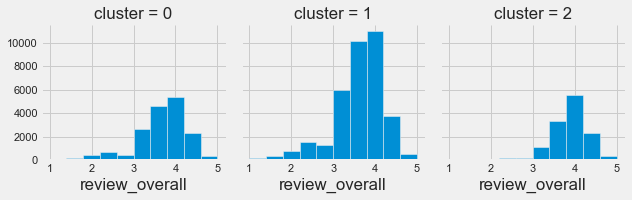

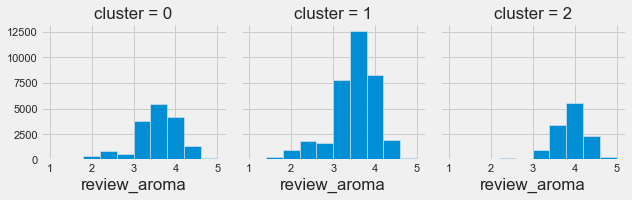

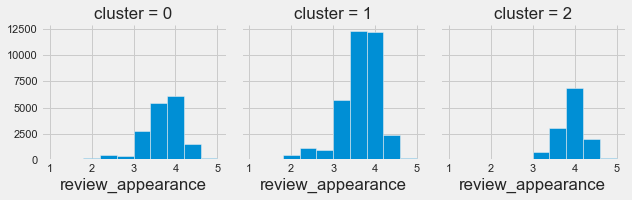

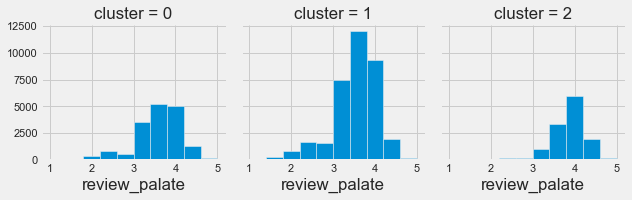

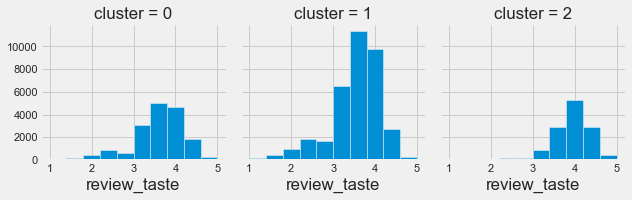

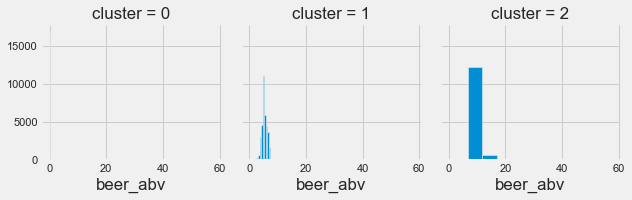

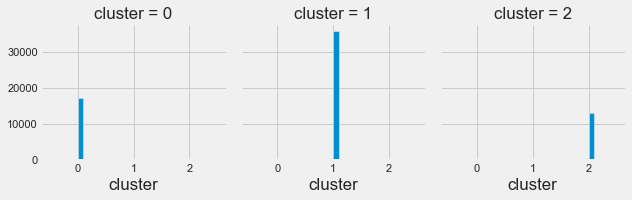

In [61]:
for column in beer_reviews_copy_by_brewery_beer_name_style:
    fig = sns.FacetGrid(beer_reviews_copy_by_brewery_beer_name_style, col="cluster")
    fig.map(plt.hist, column)
#     fig.savefig("three_clusters_histograms.jpg")
#     plt.clf()

# 7. PCA for reviews_by_beer_style

In [62]:
X = reviews_by_beer_style.drop(columns="cluster")
X.head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
beer_style,,,,,,
Altbier,3.824,3.624,3.809,3.713,3.745,5.829
American Adjunct Lager,3.002,2.480,2.789,2.735,2.683,4.862
American Amber / Red Ale,3.781,3.627,3.810,3.657,3.696,6.032
American Amber / Red Lager,3.565,3.213,3.527,3.355,3.374,4.959
American Barleywine,3.897,4.019,4.037,3.997,4.043,10.704


### Scaling

In [63]:
SS = StandardScaler()
reviews_by_beer_style_scaled = SS.fit_transform(X)

In [64]:
reviews_by_beer_style_scaled.shape

(104, 6)

### PCA

In [65]:
from sklearn.metrics.pairwise import cosine_similarity

In [66]:
distance = 1 - cosine_similarity(reviews_by_beer_style_scaled)

pca = PCA(n_components=3)
pca.fit(distance)
reviews_by_beer_style_PCA = pca.fit_transform(distance)
reviews_by_beer_style_PCA.shape

(104, 3)

### Three PCA components are expalining ~0,85 of variance - not bad at all

In [67]:
pca.explained_variance_ratio_

array([0.87122091, 0.12207164, 0.0038889 ])

In [68]:
PCA_dataset = pd.DataFrame(data = reviews_by_beer_style_PCA, columns = ['component1', 'component2', 'component3'] )
PCA_dataset.head()

,component1,component2,component3
0,-1.732,-3.829,-0.345
1,8.788,2.624,-0.173
2,-0.250,-3.786,0.236
3,9.100,1.103,-0.104
4,-6.593,2.976,-0.201


In [69]:
cluster = reviews_by_beer_style["cluster"].reset_index()
cluster

,beer_style,cluster
0,Altbier,2
1,American Adjunct Lager,2
2,American Amber / Red Ale,2
3,American Amber / Red Lager,2
4,American Barleywine,1
...,...,...
99,Vienna Lager,2
100,Weizenbock,0
101,Wheatwine,1
102,Winter Warmer,0


In [70]:
reviews_by_beer_style_PCA_clusters = pd.concat([PCA_dataset, cluster], axis=1)
reviews_by_beer_style_PCA_clusters.head()

,component1,component2,component3,beer_style,cluster
0,-1.732,-3.829,-0.345,Altbier,2
1,8.788,2.624,-0.173,American Adjunct Lager,2
2,-0.250,-3.786,0.236,American Amber / Red Ale,2
3,9.100,1.103,-0.104,American Amber / Red Lager,2
4,-6.593,2.976,-0.201,American Barleywine,1


In [71]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected = True)

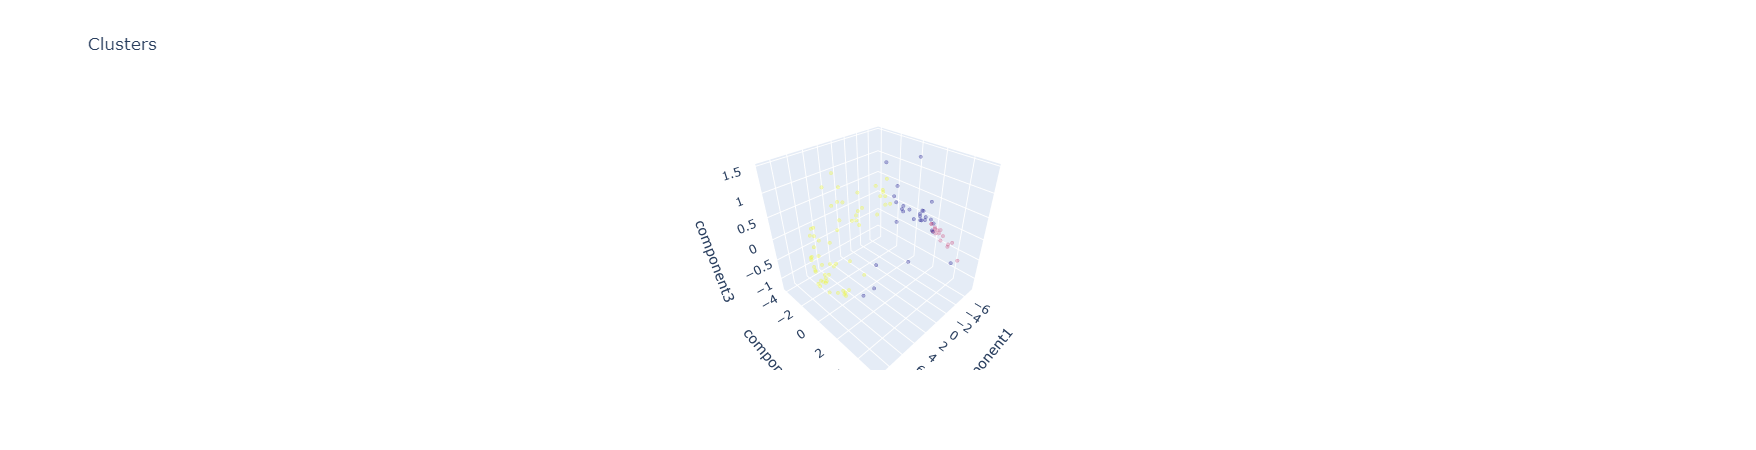

In [72]:
graph = go.Scatter3d(
    x= reviews_by_beer_style_PCA_clusters['component1'],
    y= reviews_by_beer_style_PCA_clusters['component2'],
    z= reviews_by_beer_style_PCA_clusters['component3'],
    mode='markers',
    marker=dict(
        color = reviews_by_beer_style_PCA_clusters['cluster'], 
        size= 2,
        line=dict(
            color= reviews_by_beer_style_PCA_clusters['cluster'],
            width= 12
        ),
        opacity=0.3
    )
)
data = [graph]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
        xaxis = dict(title  = 'component1'),
        yaxis = dict(title  = 'component2'),
        zaxis = dict(title  = 'component3')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

# 8. Dendrogram

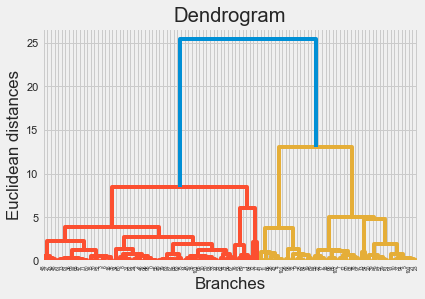

In [73]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(reviews_by_beer_style, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Branches')
plt.ylabel('Euclidean distances')
plt.show()

# 9. DBSCAN

In [74]:
from sklearn.cluster import DBSCAN
#dbs = DBSCAN(eps = 0.25, min_samples=4, metric='euclidean', n_jobs=-1)
dbs = DBSCAN(eps = 0.5, min_samples=100, metric='euclidean', algorithm='auto', n_jobs=-1)
clustering  = dbs.fit(reviews_by_beer_style)
clustering.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1], dtype=int64)

In [75]:
cluster = pd.DataFrame(clustering.labels_)
cluster = pd.DataFrame({'cluster': clustering.labels_})
cluster

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
99,-1
100,-1
101,-1
102,-1


In [76]:
cluster["cluster"].unique()

array([-1], dtype=int64)

In [77]:
credit_cards_PCA_clusters = pd.concat([PCA_dataset, cluster], axis=1)
credit_cards_PCA_clusters

,component1,component2,component3,cluster
0,-1.732,-3.829,-0.345,-1
1,8.788,2.624,-0.173,-1
2,-0.250,-3.786,0.236,-1
3,9.100,1.103,-0.104,-1
4,-6.593,2.976,-0.201,-1
...,...,...,...,...
99,7.458,-1.876,-0.298,-1
100,-7.276,0.668,-0.166,-1
101,-6.009,3.691,-0.260,-1
102,-4.677,1.251,1.454,-1


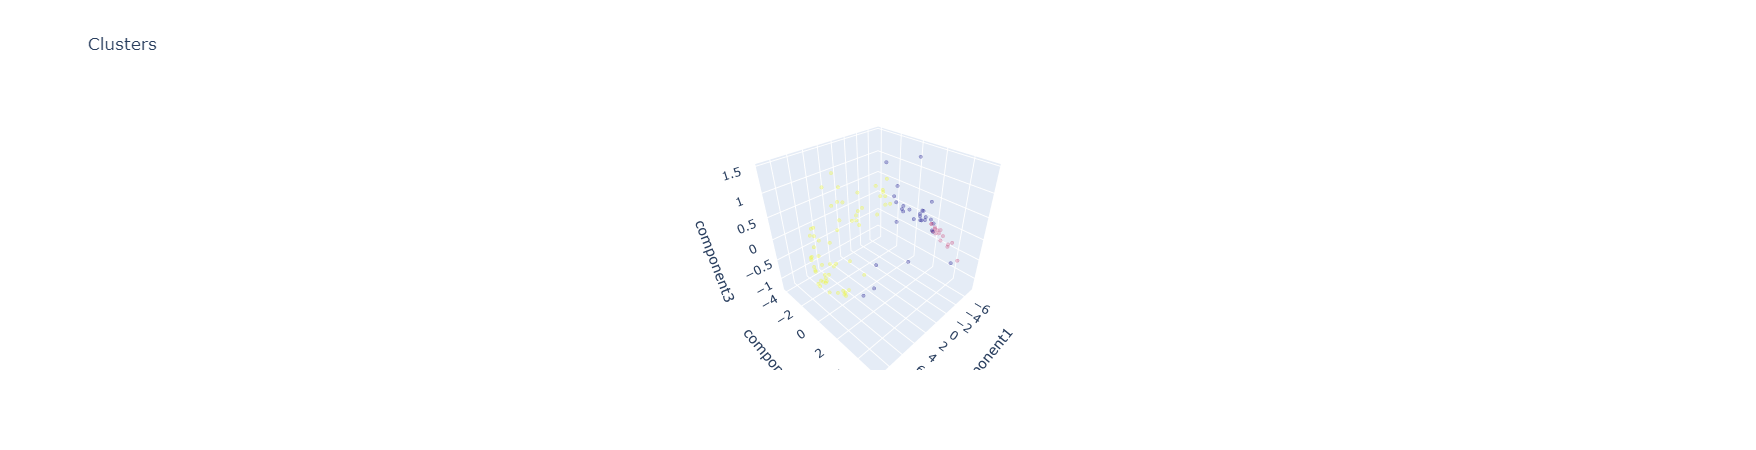

In [78]:
graph = go.Scatter3d(
    x= reviews_by_beer_style_PCA_clusters['component1'],
    y= reviews_by_beer_style_PCA_clusters['component2'],
    z= reviews_by_beer_style_PCA_clusters['component3'],
    mode='markers',
    marker=dict(
        color = reviews_by_beer_style_PCA_clusters['cluster'], 
        size= 2,
        line=dict(
            color= reviews_by_beer_style_PCA_clusters['cluster'],
            width= 12
        ),
        opacity=0.3
    )
)
data = [graph]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
        xaxis = dict(title  = 'component1'),
        yaxis = dict(title  = 'component2'),
        zaxis = dict(title  = 'component3')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

### SCORE by "beer_name"

In [79]:
#(MinimumVotes / (vote_count + MinimumVotes) * vote_average) + (MinimumVotes / (vote_count + MinimumVotes * VoteAvarageGlobal)) AS Score

In [80]:
reviews_by_beer_style

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,cluster
beer_style,,,,,,,
Altbier,3.824,3.624,3.809,3.713,3.745,5.829,2
American Adjunct Lager,3.002,2.480,2.789,2.735,2.683,4.862,2
American Amber / Red Ale,3.781,3.627,3.810,3.657,3.696,6.032,2
American Amber / Red Lager,3.565,3.213,3.527,3.355,3.374,4.959,2
American Barleywine,3.897,4.019,4.037,3.997,4.043,10.704,1
...,...,...,...,...,...,...,...
Vienna Lager,3.763,3.434,3.698,3.560,3.604,5.020,2
Weizenbock,4.008,4.045,4.009,3.991,4.077,8.135,0
Wheatwine,3.816,3.969,3.907,3.941,3.977,10.663,1


In [81]:
reviews_by_beer_style_mean_count = beer_reviews_copy[["review_overall", "beer_style"]].groupby(['beer_style']).agg(["mean", "count"]).fillna(0)
reviews_by_beer_style_mean_count.columns = reviews_by_beer_style_mean_count.columns.droplevel(0) 

In [82]:
reviews_by_beer_style_mean_count

,mean,count
beer_style,,
Altbier,3.824,7741
American Adjunct Lager,3.002,30749
American Amber / Red Ale,3.781,45751
American Amber / Red Lager,3.565,9311
American Barleywine,3.897,26728
...,...,...
Vienna Lager,3.763,8954
Weizenbock,4.008,9412
Wheatwine,3.816,3714


(array([60., 24., 12.,  2.,  3.,  1.,  0.,  1.,  0.,  1.]),
 array([   241. ,  11975.5,  23710. ,  35444.5,  47179. ,  58913.5,
         70648. ,  82382.5,  94117. , 105851.5, 117586. ]),
 <BarContainer object of 10 artists>)

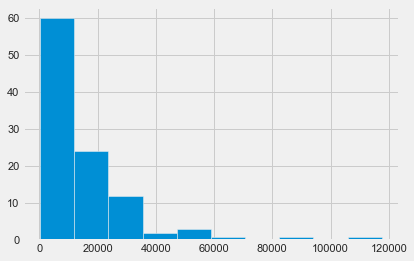

In [83]:
plt.hist(reviews_by_beer_style_mean_count["count"])

In [84]:
q1 = """SELECT * FROM reviews_by_beer_style_mean_count LIMIT 10"""
ps.sqldf(q1, locals())

,beer_style,mean,count
0,Altbier,3.824,7741
1,American Adjunct Lager,3.002,30749
2,American Amber / Red Ale,3.781,45751
3,American Amber / Red Lager,3.565,9311
4,American Barleywine,3.897,26728
5,American Black Ale,3.934,11446
6,American Blonde Ale,3.592,12726
7,American Brown Ale,3.857,25297
8,American Dark Wheat Ale,3.644,1470
9,American Double / Imperial IPA,3.998,85977


In [85]:
q1 = """SELECT AVG(mean) as MeanGlobal FROM reviews_by_beer_style_mean_count"""
ps.sqldf(q1, locals())

,MeanGlobal
0,3.732


In [86]:
q1 = """
SELECT \
beer_style \
,mean \
,count \
,((count / (count + (SELECT 2000 AS MinCount)) * mean) + (count / (count + (SELECT 2000 AS MinCount) * (SELECT AVG(mean) as MeanGlobal FROM reviews_by_beer_style_mean_count)))) AS Score \
FROM reviews_by_beer_style_mean_count \
ORDER BY Score desc
"""
ps.sqldf(q1, locals())

,beer_style,mean,count,Score
0,American IPA,3.965,117586,0.940
1,American Double / Imperial IPA,3.998,85977,0.920
2,American Pale Ale (APA),3.852,63469,0.895
3,Russian Imperial Stout,4.023,54129,0.879
4,American Double / Imperial Stout,4.030,50705,0.872
...,...,...,...,...
99,Gose,3.965,686,0.084
100,Faro,3.600,609,0.075
101,Roggenbier,3.948,466,0.059
102,Kvass,3.355,297,0.038


### SCORE by "beer_name"

In [87]:
#(MinimumVotes / (vote_count + MinimumVotes) * vote_average) + (MinimumVotes / (vote_count + MinimumVotes * VoteAvarageGlobal)) AS Score

In [88]:
reviews_by_beer_name

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,cluster
beer_name,,,,,,,
! (Old Ale),4.000,4.500,4.000,4.000,4.500,8.200,1
"""100""",4.000,4.000,4.000,4.000,4.400,10.000,1
"""100"" Pale Ale",4.000,4.000,3.500,4.000,4.000,6.600,2
"""12"" Belgian Golden Strong Ale",4.000,3.500,4.250,4.750,4.500,9.000,1
"""33"" Export",3.000,3.000,3.000,3.167,3.000,4.800,2
...,...,...,...,...,...,...,...
Žamberecký Kanec Imperial Stout,3.750,4.500,4.500,4.250,4.000,5.500,2
Ω-naught (Omeganaught),4.167,4.000,4.000,3.500,3.500,5.000,2
“Chewy” Double IPA,2.500,2.000,4.000,3.500,2.500,6.900,2


In [89]:
reviews_by_beer_name_mean_count = beer_reviews_copy[["review_overall", "beer_name"]].groupby(['beer_name']).agg(["mean", "count"]).fillna(0)
reviews_by_beer_name_mean_count.columns = reviews_by_beer_name_mean_count.columns.droplevel(0) 

In [90]:
reviews_by_beer_name_mean_count

,mean,count
beer_name,,
! (Old Ale),4.000,1
"""100""",4.000,5
"""100"" Pale Ale",4.000,1
"""12"" Belgian Golden Strong Ale",4.000,2
"""33"" Export",3.000,3
...,...,...
Žamberecký Kanec Imperial Stout,3.750,2
Ω-naught (Omeganaught),4.167,3
“Chewy” Double IPA,2.500,1


(array([5.581e+04, 6.300e+02, 2.080e+02, 9.500e+01, 5.200e+01, 2.800e+01,
        1.300e+01, 1.400e+01, 3.000e+00, 4.000e+00]),
 array([1.0000e+00, 3.2990e+02, 6.5880e+02, 9.8770e+02, 1.3166e+03,
        1.6455e+03, 1.9744e+03, 2.3033e+03, 2.6322e+03, 2.9611e+03,
        3.2900e+03]),
 <BarContainer object of 10 artists>)

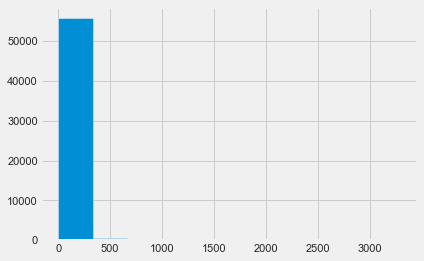

In [91]:
plt.hist(reviews_by_beer_name_mean_count["count"])

In [92]:
q1 = """SELECT * FROM reviews_by_beer_name_mean_count LIMIT 10"""
ps.sqldf(q1, locals())

,beer_name,mean,count
0,! (Old Ale),4.000,1
1,"""100""",4.000,5
2,"""100"" Pale Ale",4.000,1
3,"""12"" Belgian Golden Strong Ale",4.000,2
4,"""33"" Export",3.000,3
5,"""4"" Horse Oatmeal Stout",4.000,2
6,"""400"" Ale",3.333,18
7,"""50"" Golden Anniversary Lager",4.000,1
8,"""76"" Anniversary Ale",4.000,3
9,"""76"" Anniversary Ale With English Hops",4.000,1


In [93]:
q1 = """SELECT AVG(mean) as MeanGlobal FROM reviews_by_beer_name_mean_count"""
ps.sqldf(q1, locals())

,MeanGlobal
0,3.655


In [94]:
q1 = """
SELECT \
beer_name \
,mean \
,count \
,((count / (count + (SELECT 10 AS MinCount)) * mean) + (count / (count + (SELECT 10 AS MinCount) * (SELECT AVG(mean) as MeanGlobal FROM reviews_by_beer_name_mean_count)))) AS Score \
FROM reviews_by_beer_name_mean_count \
ORDER BY Score desc
"""
beer_names_scores = pd.DataFrame(ps.sqldf(q1, locals()))
beer_names_scores

,beer_name,mean,count,Score
0,90 Minute IPA,4.146,3290,0.989
1,India Pale Ale,3.843,3130,0.988
2,Old Rasputin Russian Imperial Stout,4.174,3111,0.988
3,Sierra Nevada Celebration Ale,4.169,3000,0.988
4,Two Hearted Ale,4.330,2728,0.987
...,...,...,...,...
56852,Świąteczne,2.000,1,0.027
56853,Žamberecký Kanec 14°,3.500,1,0.027
56854,“Chewy” Double IPA,2.500,1,0.027
56855,横須賀ビアサケ (Yokosuka Biasake),4.000,1,0.027


    - If you had to pick 3 beers to recommend to someone, how would you approach the problem ?

### TFIDF

In [95]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidf = TfidfVectorizer(stop_words='english')

In [96]:
beer_reviews[["brewery_name", "beer_style", "beer_name"]] = beer_reviews[["brewery_name", "beer_style", "beer_name"]].fillna('')
beer_reviews["brewery_name_beer_style_beer_name"] = beer_reviews["brewery_name"] + beer_reviews["beer_style"] + beer_reviews["beer_name"]

In [97]:
tfidf_matrix = tfidf.fit_transform(beer_reviews["brewery_name_beer_style_beer_name"].unique())
#tfidf_matrix = tfidf.fit_transform(beer_reviews["brewery_name_beer_style_beer_name"])
tfidf_matrix.shape

(65754, 56064)

In [98]:
start_time = time.time()
cosine = linear_kernel(tfidf_matrix, tfidf_matrix, dense_output=True)
print("--- %s seconds ---" % round((time.time() - start_time)))

--- 127 seconds ---


In [99]:
#indices = pd.Series(beer_reviews.index, index=beer_reviews['beer_name']).drop_duplicates()
#indices

In [100]:
# beer_reviews[["brewery_name", "beer_style", "beer_name"]].drop_duplicates().reset_index()

In [101]:
indices = beer_reviews[["brewery_name", "beer_style", "beer_name"]].drop_duplicates().reset_index().drop(columns=["brewery_id", "beer_beerid", "review_time"])
indices = indices.set_index(["brewery_name", "beer_style", "beer_name"])
indices.insert(0, 'index', range(0, 0 + len(indices)))

In [102]:
indices

index
brewery_name                beer_style                     beer_name                    
Vecchio Birraio             Hefeweizen                     Sausa Weizen                0
                            English Strong Ale             Red Moon                    1
                            Foreign / Export Stout         Black Horse Black Beer      2
                            German Pilsener                Sausa Pils                  3
Caldera Brewing Company     American Double / Imperial IPA Cauldron DIPA               4
...                                                                                  ...
The Defiant Brewing Company American Porter                Highland Porter         65749
                            Hefeweizen                     Baron Von Weizen        65750
                            Belgian Strong Pale Ale        Resolution #2           65751
                            American Double / Imperial IPA Double IPA              65752
                            Pumpkin Ale                    The Horseman's Ale      65753

[65754 rows x 1 columns]

In [103]:
# indices = beer_reviews[["brewery_name", "beer_style", "beer_name"]].drop_duplicates().reset_index().drop(columns=["index"]).index, index=beer_reviews[["brewery_name", "beer_style", "beer_name"]].drop_duplicates().drop_duplicates()

In [104]:
# indices = pd.Series(beer_reviews[["brewery_name", "beer_style", "beer_name"]].drop_duplicates().reset_index().drop(columns=["index"]).index, index=beer_reviews[["brewery_name", "beer_style", "beer_name"]].drop_duplicates()).drop_duplicates()

In [105]:
# indices

In [106]:
idx = indices.xs("Zywiec Beer", level="beer_name")
idx["index"]

brewery_name                     beer_style     
Zywiec Breweries PLC (Heineken)  Euro Pale Lager    58269
Name: index, dtype: int32

In [107]:
indices.loc[("Vecchio Birraio", "Hefeweizen", "Sausa Weizen")]

index    0
Name: (Vecchio Birraio, Hefeweizen, Sausa Weizen), dtype: int32

In [108]:
# indices = beer_reviews["beer_name"].reset_index().drop(columns=["beer_beerid", "brewery_id", "review_time"]).drop_duplicates().index=beer_reviews["beer_name"].unique()
# indices

### CONTENT BASED RECOMMENDER

In [109]:
pd.DataFrame(cosine).shape

(65754, 65754)

In [110]:
# beer_reviews[["brewery_name", "beer_style", "beer_name"]].drop_duplicates().reset_index().drop(columns=["index"])

In [111]:
def beer_content_based_recommender(beer_name, cosine=cosine):
    #idx = indices.xs(beer_name, level="beer_name")
    #idx = indices["index"]
    idx = indices.loc[beer_name]
    print("initial beer index: " + str(idx["index"]))
    scores = list(enumerate(cosine[int(idx)]))
    #scores = list(enumerate(cosine[65753]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    scores = scores[1:4]
    print("len scores: " + str(len(scores)))
    beer_indices = [i[0] for i in scores]
    print("recommended beers indexes: " + str(beer_indices))
    #return beer_reviews[["brewery_name", "beer_style", "beer_name"]].drop_duplicates().reset_index().drop(columns=["brewery_id", "beer_beerid", "review_time"]).iloc[beer_indices]


    return pd.merge(
    left=beer_reviews[["brewery_name", "beer_style", "beer_name"]].drop_duplicates().reset_index().drop(columns=["brewery_id", "beer_beerid", "review_time"]).iloc[beer_indices],
    right=beer_names_scores,
    how="left",
    on="beer_name",
    sort="Score"
)

    - If you had to pick 3 beers to recommend to someone, how would you approach the problem ?

In [112]:
beer_content_based_recommender(("Vecchio Birraio", "Hefeweizen", "Sausa Weizen")).sort_values(by=["Score"], ascending=False)

initial beer index: 0
len scores: 3
recommended beers indexes: [1, 2, 3]


,brewery_name,beer_style,beer_name,mean,count,Score
0,Vecchio Birraio,Foreign / Export Stout,Black Horse Black Beer,3.000,1,0.027
1,Vecchio Birraio,English Strong Ale,Red Moon,3.000,1,0.027
2,Vecchio Birraio,German Pilsener,Sausa Pils,3.000,1,0.027


In [113]:
beer_content_based_recommender(("The Defiant Brewing Company", "Pumpkin Ale", "The Horseman's Ale")).sort_values(by=["Score"], ascending=False)

initial beer index: 65753
len scores: 3
recommended beers indexes: [65709, 57392, 14767]


,brewery_name,beer_style,beer_name,mean,count,Score
0,Voodoo Brewing Company,Pumpkin Ale,Headless Horseman,3.731,13,0.262
1,The Defiant Brewing Company,Pumpkin Ale,Headless Horseman Pumpkin Ale,3.571,7,0.161
2,Mishawaka Brewing Company,American Amber / Red Ale,The Fifth Horseman,4.000,1,0.027


In [114]:
beer_content_based_recommender(("Warsteiner Brauerei", "German Pilsener", "Warsteiner Premium Verum")).sort_values(by=["Score"], ascending=False)

initial beer index: 22531
len scores: 3
recommended beers indexes: [22577, 22587, 22578]


,brewery_name,beer_style,beer_name,mean,count,Score
1,Warsteiner Brauerei,Märzen / Oktoberfest,Warsteiner Premium Oktoberfest,3.552,165,0.819
2,Warsteiner Brauerei,Fruit / Vegetable Beer,Warsteiner Premium Orange,2.500,6,0.141
0,Warsteiner Brauerei,Light Lager,Warsteiner Premium Light,3.000,4,0.099


    - Which brewery produces the strongest beers by abv ?

In [115]:
# beer_reviews_copy[["review_overall", "beer_style"]].groupby(['beer_style']).agg(["mean", "count"]).fillna(0)
beer_reviews_by_brewery_stats = beer_reviews_copy[["brewery_name", "beer_abv"]].groupby(["brewery_name"]).agg(["min", "mean", "max", "var", "count"]).fillna(0)
beer_reviews_by_brewery_stats.columns = beer_reviews_by_brewery_stats.columns.droplevel(0)
beer_reviews_by_brewery_stats.sort_values(by=["max", "mean"], ascending=False)

,min,mean,max,var,count
brewery_name,,,,,
Schorschbräu,4.900,19.229,57.700,151.962,34
BrewDog,0.500,9.905,41.000,39.208,4033
De Struise Brouwers,2.000,10.763,39.000,10.425,3866
Hair of the Dog Brewing Company / Brewery and Tasting Room,3.200,9.407,29.000,5.374,3769
Boston Beer Company (Samuel Adams),4.000,6.415,27.000,8.895,38812
...,...,...,...,...,...
Yellow Rose Brewing Company,0.000,0.000,0.000,0.000,0
Yozgut Bira Fabrikasi / Tekel Birasi,0.000,0.000,0.000,0.000,0
Yuiga Doxon Ji Beer,0.000,0.000,0.000,0.000,0


http://cms.worlds-strongest-beer.com/wp-content/uploads/2014/01/Schorschbock-57-033-quadrat.jpg

    - I enjoy a beer which aroma and appearance matches the beer style. What beer should I buy ?

### Aroma

In [116]:
# beer_reviews_copy[["review_overall", "beer_style"]].groupby(['beer_style']).agg(["mean", "count"]).fillna(0)
beer_reviews_by_beer_style_aroma_stats = beer_reviews_copy[["beer_style", "review_aroma"]].groupby(["beer_style"]).agg(["min", "mean", "median", "max", "var", "count"]).fillna(0)
beer_reviews_by_beer_style_aroma_stats.columns = beer_reviews_by_beer_style_aroma_stats.columns.droplevel(0)
beer_reviews_by_beer_style_aroma_stats.sort_values(by=["max", "var", "median"], ascending=[False, True, False], inplace=True)
beer_reviews_by_beer_style_aroma_stats.insert(0, 'rank', range(0, 0 + len(beer_reviews_by_beer_style_aroma_stats.index)))
beer_reviews_by_beer_style_aroma_stats

,rank,min,mean,median,max,var,count
beer_style,,,,,,,
Roggenbier,0,2.000,3.835,4.000,5.000,0.215,466
Gose,1,1.500,3.784,4.000,5.000,0.259,686
Belgian IPA,2,1.000,3.980,4.000,5.000,0.261,12471
Weizenbock,3,1.000,4.045,4.000,5.000,0.270,9412
American Barleywine,4,1.000,4.019,4.000,5.000,0.275,26728
...,...,...,...,...,...,...,...
Fruit / Vegetable Beer,99,1.000,3.526,3.500,5.000,0.628,33861
Low Alcohol Beer,100,1.000,2.463,2.500,5.000,0.709,1201
American Malt Liquor,101,1.000,2.414,2.500,5.000,0.724,3925


https://100mostow.pl/wp-content/uploads/2016/09/roggen-1.png

### Appearance

In [117]:
# beer_reviews_copy[["review_overall", "beer_style"]].groupby(['beer_style']).agg(["mean", "count"]).fillna(0)
beer_reviews_by_beer_style_appearance_stats = beer_reviews_copy[["beer_style", "review_appearance"]].groupby(["beer_style"]).agg(["min", "mean", "median", "max", "var", "count"]).fillna(0)
beer_reviews_by_beer_style_appearance_stats.columns = beer_reviews_by_beer_style_appearance_stats.columns.droplevel(0)
beer_reviews_by_beer_style_appearance_stats.sort_values(by=["max", "var", "median"], ascending=[False, True, False], inplace=True)
beer_reviews_by_beer_style_appearance_stats.insert(0, 'rank', range(0, 0 + len(beer_reviews_by_beer_style_appearance_stats.index)))
beer_reviews_by_beer_style_appearance_stats

,rank,min,mean,median,max,var,count
beer_style,,,,,,,
Gose,0,2.000,3.908,4.000,5.000,0.173,686
American Black Ale,1,1.000,4.113,4.000,5.000,0.207,11446
American Double / Imperial IPA,2,1.000,4.079,4.000,5.000,0.220,85977
Flanders Red Ale,3,1.000,4.002,4.000,5.000,0.228,6664
Wheatwine,4,1.000,3.907,4.000,5.000,0.229,3714
...,...,...,...,...,...,...,...
Happoshu,99,1.000,2.925,3.000,5.000,0.636,241
American Malt Liquor,100,1.000,2.838,3.000,5.000,0.652,3925
Light Lager,101,1.000,2.429,2.500,5.000,0.708,14311


https://en.wikipedia.org/wiki/Gose

* Sum of Ranks

In [118]:
beer_reviews_by_beer_style_aroma_X_appearance = pd.merge(left=beer_reviews_by_beer_style_aroma_stats, right=beer_reviews_by_beer_style_appearance_stats, on="beer_style", suffixes=('_aroma', '_appearance'))
beer_reviews_by_beer_style_aroma_X_appearance

,rank_aroma,min_aroma,mean_aroma,median_aroma,max_aroma,var_aroma,count_aroma,rank_appearance,min_appearance,mean_appearance,median_appearance,max_appearance,var_appearance,count_appearance
beer_style,,,,,,,,,,,,,,
Roggenbier,0,2.000,3.835,4.000,5.000,0.215,466,57,1.000,3.824,4.000,5.000,0.283,466
Gose,1,1.500,3.784,4.000,5.000,0.259,686,0,2.000,3.908,4.000,5.000,0.173,686
Belgian IPA,2,1.000,3.980,4.000,5.000,0.261,12471,6,1.000,4.075,4.000,5.000,0.231,12471
Weizenbock,3,1.000,4.045,4.000,5.000,0.270,9412,30,1.000,4.009,4.000,5.000,0.260,9412
American Barleywine,4,1.000,4.019,4.000,5.000,0.275,26728,5,1.000,4.037,4.000,5.000,0.229,26728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fruit / Vegetable Beer,99,1.000,3.526,3.500,5.000,0.628,33861,95,1.000,3.518,3.500,5.000,0.468,33861
Low Alcohol Beer,100,1.000,2.463,2.500,5.000,0.709,1201,102,1.000,2.918,3.000,5.000,0.710,1201
American Malt Liquor,101,1.000,2.414,2.500,5.000,0.724,3925,100,1.000,2.838,3.000,5.000,0.652,3925


In [119]:
beer_reviews_by_beer_style_aroma_X_appearance["sum_of_ranks"] = beer_reviews_by_beer_style_aroma_X_appearance["rank_aroma"] + beer_reviews_by_beer_style_aroma_X_appearance["rank_appearance"]
beer_reviews_by_beer_style_aroma_X_appearance.sort_values(by=["sum_of_ranks"], inplace=True)
beer_reviews_by_beer_style_aroma_X_appearance

,rank_aroma,min_aroma,mean_aroma,median_aroma,max_aroma,var_aroma,count_aroma,rank_appearance,min_appearance,mean_appearance,median_appearance,max_appearance,var_appearance,count_appearance,sum_of_ranks
beer_style,,,,,,,,,,,,,,,
Gose,1,1.500,3.784,4.000,5.000,0.259,686,0,2.000,3.908,4.000,5.000,0.173,686,1
American Black Ale,5,1.000,3.930,4.000,5.000,0.277,11446,1,1.000,4.113,4.000,5.000,0.207,11446,6
Belgian IPA,2,1.000,3.980,4.000,5.000,0.261,12471,6,1.000,4.075,4.000,5.000,0.231,12471,8
American Barleywine,4,1.000,4.019,4.000,5.000,0.275,26728,5,1.000,4.037,4.000,5.000,0.229,26728,9
Wheatwine,9,1.000,3.969,4.000,5.000,0.288,3714,4,1.000,3.907,4.000,5.000,0.229,3714,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Light Lager,98,1.000,2.170,2.000,5.000,0.615,14311,101,1.000,2.429,2.500,5.000,0.708,14311,199
American Malt Liquor,101,1.000,2.414,2.500,5.000,0.724,3925,100,1.000,2.838,3.000,5.000,0.652,3925,201
Happoshu,103,1.000,2.595,2.500,4.500,0.572,241,99,1.000,2.925,3.000,5.000,0.636,241,202


    - What are the factors that impacts the quality of beer the most ?

In [120]:
beer_reviews["review_overall"].round().unique()

array([2., 3., 4., 5., 1., 0.])

# 5. Defining Binary Target for classification 

### Possible states of projects

In [121]:
beer_reviews[["review_overall"]] = beer_reviews["review_overall"].round().astype('category')

In [122]:
beer_reviews.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1586614 entries, (10325, 47986, Timestamp('2009-02-16 20:57:03')) to (14359, 33061, Timestamp('2006-10-04 23:41:59'))
Data columns (total 11 columns):
 #   Column                             Non-Null Count    Dtype   
---  ------                             --------------    -----   
 0   brewery_name                       1586614 non-null  object  
 1   review_overall                     1586614 non-null  category
 2   review_aroma                       1586614 non-null  float64 
 3   review_appearance                  1586614 non-null  float64 
 4   review_profilename                 1586266 non-null  object  
 5   beer_style                         1586614 non-null  object  
 6   review_palate                      1586614 non-null  float64 
 7   review_taste                       1586614 non-null  float64 
 8   beer_name                          1586614 non-null  object  
 9   beer_abv                           1518829 non-null  floa

In [123]:
beer_reviews[["beer_name","review_overall"]].groupby(["review_overall"]).agg(["count"]).fillna(0)

,beer_name
,count
review_overall,
0.0,7
1.0,10954
2.0,109723
3.0,165644
4.0,1208966
5.0,91320


### Target

In [124]:
beer_reviews["quality"] = beer_reviews['review_overall'].apply(lambda x: 0 if x <= 4 else 1)
beer_reviews

brewery_name  \
brewery_id beer_beerid review_time                                        
10325      47986       2009-02-16 20:57:03              Vecchio Birraio   
           48213       2009-03-01 13:44:57              Vecchio Birraio   
           48215       2009-03-01 14:10:04              Vecchio Birraio   
           47969       2009-02-15 19:12:25              Vecchio Birraio   
1075       64883       2010-12-30 18:53:26      Caldera Brewing Company   
...                                                                 ...   
14359      33061       2006-11-05 00:01:32  The Defiant Brewing Company   
                       2006-10-17 01:29:26  The Defiant Brewing Company   
                       2006-10-13 01:21:53  The Defiant Brewing Company   
                       2006-10-05 04:37:24  The Defiant Brewing Company   
                       2006-10-04 23:41:59  The Defiant Brewing Company   

                                           review_overall  review_aroma  \
brewery_id beer_beerid review_time                                        
10325      47986       2009-02-16 20:57:03          2.000         2.000   
           48213       2009-03-01 13:44:57          3.000         2.500   
           48215       2009-03-01 14:10:04          3.000         2.500   
           47969       2009-02-15 19:12:25          3.000         3.000   
1075       64883       2010-12-30 18:53:26          4.000         4.500   
...                                                   ...           ...   
14359      33061       2006-11-05 00:01:32          5.000         4.000   
                       2006-10-17 01:29:26          4.000         5.000   
                       2006-10-13 01:21:53          4.000         3.500   
                       2006-10-05 04:37:24          4.000         4.500   
                       2006-10-04 23:41:59          5.000         4.500   

                                            review_appearance  \
brewery_id beer_beerid review_time                              
10325      47986       2009-02-16 20:57:03              2.500   
           48213       2009-03-01 13:44:57              3.000   
           48215       2009-03-01 14:10:04              3.000   
           47969       2009-02-15 19:12:25              3.500   
1075       64883       2010-12-30 18:53:26              4.000   
...                                                       ...   
14359      33061       2006-11-05 00:01:32              3.500   
                       2006-10-17 01:29:26              2.500   
                       2006-10-13 01:21:53              3.000   
                       2006-10-05 04:37:24              4.500   
                       2006-10-04 23:41:59              4.500   

                                           review_profilename  \
brewery_id beer_beerid review_time                              
10325      47986       2009-02-16 20:57:03            stcules   
           48213       2009-03-01 13:44:57            stcules   
           48215       2009-03-01 14:10:04            stcules   
           47969       2009-02-15 19:12:25            stcules   
1075       64883       2010-12-30 18:53:26     johnmichaelsen   
...                                                       ...   
14359      33061       2006-11-05 00:01:32         maddogruss   
                       2006-10-17 01:29:26          yelterdow   
                       2006-10-13 01:21:53           TongoRad   
                       2006-10-05 04:37:24           dherling   
                       2006-10-04 23:41:59               cbl2   

                                                                beer_style  \
brewery_id beer_beerid review_time                                           
10325      47986       2009-02-16 20:57:03                      Hefeweizen   
           48213       2009-03-01 13:44:57              English Strong Ale   
           48215       2009-03-01 14:10:04          Foreign / Export Stout   
           47969       20

# 6. Splitting the data set into Train and Test sets

In [125]:
beer_reviews = beer_reviews.drop(columns=["review_overall", "review_profilename", "beer_name", "brewery_name_beer_style_beer_name"]).drop_duplicates()
beer_reviews

brewery_name  \
brewery_id beer_beerid review_time                                        
10325      47986       2009-02-16 20:57:03              Vecchio Birraio   
           48213       2009-03-01 13:44:57              Vecchio Birraio   
           48215       2009-03-01 14:10:04              Vecchio Birraio   
           47969       2009-02-15 19:12:25              Vecchio Birraio   
1075       64883       2010-12-30 18:53:26      Caldera Brewing Company   
...                                                                 ...   
14359      33061       2006-11-05 00:01:32  The Defiant Brewing Company   
                       2006-10-17 01:29:26  The Defiant Brewing Company   
                       2006-10-13 01:21:53  The Defiant Brewing Company   
                       2006-10-05 04:37:24  The Defiant Brewing Company   
                       2006-10-04 23:41:59  The Defiant Brewing Company   

                                            review_aroma  review_appearance  \
brewery_id beer_beerid review_time                                            
10325      47986       2009-02-16 20:57:03         2.000              2.500   
           48213       2009-03-01 13:44:57         2.500              3.000   
           48215       2009-03-01 14:10:04         2.500              3.000   
           47969       2009-02-15 19:12:25         3.000              3.500   
1075       64883       2010-12-30 18:53:26         4.500              4.000   
...                                                  ...                ...   
14359      33061       2006-11-05 00:01:32         4.000              3.500   
                       2006-10-17 01:29:26         5.000              2.500   
                       2006-10-13 01:21:53         3.500              3.000   
                       2006-10-05 04:37:24         4.500              4.500   
                       2006-10-04 23:41:59         4.500              4.500   

                                                                beer_style  \
brewery_id beer_beerid review_time                                           
10325      47986       2009-02-16 20:57:03                      Hefeweizen   
           48213       2009-03-01 13:44:57              English Strong Ale   
           48215       2009-03-01 14:10:04          Foreign / Export Stout   
           47969       2009-02-15 19:12:25                 German Pilsener   
1075       64883       2010-12-30 18:53:26  American Double / Imperial IPA   
...                                                                    ...   
14359      33061       2006-11-05 00:01:32                     Pumpkin Ale   
                       2006-10-17 01:29:26                     Pumpkin Ale   
                       2006-10-13 01:21:53                     Pumpkin Ale   
                       2006-10-05 04:37:24                     Pumpkin Ale   
                       2006-10-04 23:41:59                     Pumpkin Ale   

                                            review_palate  review_taste  \
brewery_id beer_beerid review_time                                        
10325      47986       2009-02-16 20:57:03          1.500         1.500   
           48213       2009-03-01 13:44:57          3.000         3.000   
           48215       2009-03-01 14:10:04          3.000         3.000   
           47969       2009-02-15 19:12:25          2.500         3.000   
1075       64883       2010-12-30 18:53:26          4.000         4.500   
...                                                   ...           ...   
14359      33061       2006-11-05 00:01:32          4.000         4.000   
                       2006-10-17 01:29:26          2.000         4.000   
                       2006-10-13 01:21:53          3.500         4.000   
                       2006-10-05 04:37:24          4.500         4.500   
                       2006-10-04 23:41:59          4.500         4.500   

                                            beer_abv  quality  


In [136]:
X_train, X_test, y_train, y_test = train_test_split(beer_reviews, beer_reviews['quality'], test_size=.40, shuffle=True)

In [147]:
X_train[["brewery_name", "quality"]].groupby(["quality"]).count()

,brewery_name
quality,
0,450676
1,34765


In [144]:
X_test[["brewery_name", "quality"]].groupby(["quality"]).count()

,brewery_name
quality,
0,300384
1,23244


In [ ]:
# ### BEGIN SOLUTION
# from sklearn.model_selection import StratifiedShuffleSplit

# # Get the split indexes
# strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
#                                           test_size=0.3, 
#                                           random_state=42)

# train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# # Create the dataframes
# X_train = data.loc[train_idx, feature_cols]
# y_train = data.loc[train_idx, 'Activity']

# X_test  = data.loc[test_idx, feature_cols]
# y_test  = data.loc[test_idx, 'Activity']

# 7. Defining Pipeline for classification

https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf

In [150]:
X_train.head()

,,,brewery_name,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_abv,quality
brewery_id,beer_beerid,review_time,,,,,,,,
18149,51866,2009-08-15 20:44:28,The Lost Abbey,5.000,4.500,Belgian Strong Dark Ale,4.000,5.000,8.000,0
20132,63525,2011-11-18 21:25:09,Les Brasseurs Du Temps,2.500,4.000,American Double / Imperial IPA,3.000,2.500,10.000,0
221,689,2011-10-03 02:47:36,Desnoes & Geddes Limited,2.500,2.500,American Adjunct Lager,2.500,3.000,4.700,0
1394,24958,2006-06-08 05:10:55,Skagit River Brewery,3.500,3.000,Scottish Ale,4.000,4.000,5.500,0
193,2081,2009-11-17 04:33:06,Anderson Valley Brewing Company,3.500,3.000,Winter Warmer,4.000,4.000,6.900,0


In [151]:
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler()), ("variance_threshold", VarianceThreshold(threshold=(.9 * (1 - .9))))])

In [152]:
categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")), ("onehotenc", OneHotEncoder(handle_unknown="ignore")), ("variance_threshold", VarianceThreshold(threshold=(.9 * (1 - .9))))])

In [155]:
numeric_features = X_train.select_dtypes(include=["int32", "int64", "float64"]).columns

In [156]:
numeric_features

Index(['review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'beer_abv', 'quality'],
      dtype='object')

In [159]:
categorical_features = X_train.select_dtypes(include=["object"]).columns

In [160]:
categorical_features

Index(['brewery_name', 'beer_style'], dtype='object')

In [161]:
preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features)
                                               ,("cat", categorical_transformer, categorical_features)])

In [ ]:
classifiers = [
    LogisticRegression(n_jobs=-1)
    ,DecisionTreeClassifier(n_jobs=-1)
    ,RandomForestClassifier(n_jobs=-1)
]

for classifier in classifiers:
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", classifier)])
    pipe.fit(X_train, y_train)
    print(classifier)
    print("Model Score: %.4f" % pipe.score(X_test, y_test))
    print()

### Get parameters

In [ ]:
pipe.get_params()

# 8. Accuracy measures

In [ ]:
y_pred = pipe.predict(X_test)
y_pred

In [ ]:
y_prob = pipe.predict_proba(X_test)
y_prob

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve, f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

print(score_df)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})
labels = ['True', 'False']
ax.set_xticklabels(labels, fontsize=25);
#ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

In [ ]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = pipe.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()